# Averaging Function Testing
## Imorting relevant directories

In [1]:
from pathlib import Path
import sys
sys.path.append('../')
from pma_open import *


## Naming relevant paths


In [2]:
file_path = '../Dropbox Files/hel1.pma'

## Average Frame Array function (avg_frame_arr)

In [3]:
#Testing avg_frame_arr function
avg_frame_data = avg_frame_arr(file_path)

Image Size: 512 x 512
Sucessfully generated average frame


In [4]:
print(f"Average Frame Data- shape: {avg_frame_data.shape}")
print(f"Average Frame Data- Type: {type(avg_frame_data)}")
print(f"Average Frame Data- dType: {avg_frame_data.dtype}")
# print(f"First line of Average Frame Data: {avg_frame_data[0]}")

Average Frame Data- shape: (512, 512)
Average Frame Data- Type: <class 'numpy.ndarray'>
Average Frame Data- dType: uint8


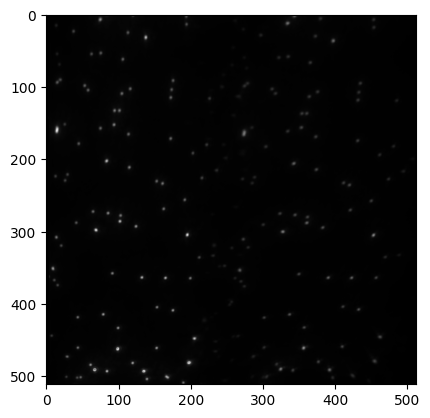

In [5]:
#Display Average frame using matplotlib
image = plt.imshow(avg_frame_data, cmap="grey");

## Average Frame png function (avg_frame_png)

In [6]:
#Testing avg_frame_png function
avg_frame_png(file_path)

Image Size: 512 x 512
Image Size: 512 x 512
Sucessfully generated average frame
Average frame saved as: hel1_Avg_Frame.png


<class 'numpy.ndarray'>
uint8
(512, 512)
7 213


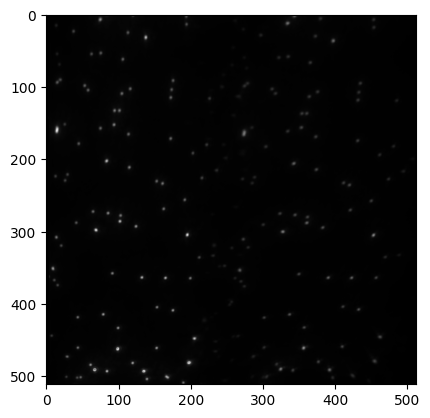

In [7]:
image_path = "hel1_Avg_Frame/hel1_Avg_Frame.png"
hel1_avg_image = io.imread(image_path)

# show the image
print(type(hel1_avg_image))
print(hel1_avg_image.dtype)
print(hel1_avg_image.shape)
print(hel1_avg_image.min(), hel1_avg_image.max())

plt.imshow(hel1_avg_image, cmap="gray");

# Finding Peaks

## Scipy.ndimage maximum_filter
#### Assumes Gaussian PSF
#### Arguments: peak radius intensity threshold (scalar_percent)


In [8]:
def find_peaks_scipy(image_path, peak_radius, scaler_percent):

    image = io.imread(image_path, as_gray=True).astype(np.uint8)
    sigma = peak_radius / 3.0
    min_intensity = np.min(image)
    max_intensity = np.max(image)
    threshold = min_intensity + (scaler_percent / 100.0) * (max_intensity - min_intensity)
    
    #Local max filter
    local_max = maximum_filter(image, size=(7, 7)) == image
    #Intensity threshold
    peaks = (image >= threshold) & local_max
    #Label peaks
    labeled, num_features = label(peaks)
    #Get peak coords
    peak_coords = np.column_stack(np.where(labeled > 0))
    
    return peak_coords


    # return labeled


In [9]:
peaks_scipy = find_peaks_scipy(image_path, peak_radius=2, scaler_percent=35)
print(f"Number of peaks detected: {len(peaks_scipy)}")
print(f"First 10 peak coordinates:\n {peaks_scipy[:10]}")
print(f"Peaks data type: {peaks_scipy.dtype}")
# peaks_scipy=find_peaks_scipy(image_path, peak_radius=2, scaler_percent=35)
# print(f"Labeled peaks data type: {type(peaks_scipy)}")
# print(f"Labeled peaks: {peaks_scipy[:5]}")
# print(f"Labeled peaks size: {(peaks_scipy[0])}")


Number of peaks detected: 70
First 10 peak coordinates:
 [[  2 344]
 [  7  75]
 [ 12 334]
 [ 32 138]
 [ 37 397]
 [ 62 106]
 [ 94  15]
 [ 99  53]
 [103 116]
 [105  58]]
Peaks data type: int64


In [10]:
#Image on dropbox
hel1_ave_path = '../Dropbox Files/hel1_ave_LF_Circ.tif'
hel1_ave_image = io.imread(hel1_ave_path)

#My image path 
image = io.imread(image_path, as_gray=True)

# f, axes = plt.subplots(1, 2, figsize=(16, 16))

# axes[0].imshow(image, cmap="gray")
# axes[0].scatter(peaks_scipy[:, 1], peaks_scipy[:, 0], s=50, facecolors='none', edgecolors='r', label='Peaks')
# axes[0].legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# #display ../pma files/hel1_ave_LF_Circ.tif next to plt.imshow(image) side by side
# axes[1].imshow(hel1_ave_image)
# axes[1].legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
# plt.show()

## Comparing the plots, we can see that there are clear spots that my function misses that are circled on the right plot and there are spots that are possibly too bridge that my function identifies as a spot! We need to fix this.

## Filter peaks. We want this function to filter out bad peaks from good peaks. 
#### Bad peaks are:
#### peaks that cover areas larger than 4x4
#### outside of the 10 pixel boarder

In [11]:
# # print(type(peaks_scipy_IDL))
# good_peaks =[]
# for peak in peaks_coords_IDL:
#     if peak[0]<10 or peak[0]>image.shape[0]-10 or peak[1]<10 or peak[1]>image.shape[1]-10:
#         good_peaks.append(peak)
# good_peaks = np.array(good_peaks)
# print(good_peaks)
# # print(peaks_scipy_IDL)


NameError: name 'peaks_coords_IDL' is not defined

## skimage.feature.peak_local_max 

#### skimage.feature.peak_local_max(image, min_distance=1, threshold_abs=None, threshold_rel=None, exclude_border=True, num_peaks=inf, footprint=None, labels=None, num_peaks_per_label=inf, p_norm=inf)

Find peaks in an image as coordinate list.

Peaks are the local maxima in a region of 2 * min_distance + 1 (i.e. peaks are separated by at least min_distance).

If both threshold_abs and threshold_rel are provided, the maximum of the two is chosen as the minimum intensity threshold of peaks.

In [ ]:
# def find_peaks_scikit(image_path, peak_radius, scaler_percent):

#     image = io.imread(image_path, as_gray=True).astype(np.uint8)
#     sigma = peak_radius / 3.0
#     min_intensity = np.min(image)
#     max_intensity = np.max(image)
#     threshold = min_intensity + (scaler_percent / 100.0) * (max_intensity - min_intensity)


#     peak_coords = feature.peak_local_max(image, min_distance=int(sigma), threshold_abs=threshold)
    
#     return peak_coords

In [ ]:
# peaks_scikit = find_peaks_scikit(image_path, peak_radius=2, scaler_percent=20)
# print(f"Number of peaks detected: {len(peaks_scikit)}")
# print(f"First 10 peak coordinates:\n {peaks_scikit[:10]}")
# print(f"Peaks data type: {peaks_scikit.dtype}")

In [ ]:
# plt.imshow(image, cmap="gray")
# plt.scatter(peaks_scikit[:, 1], peaks_scikit[:, 0], s=50, facecolors='none', edgecolors='r', label='Peaks')
# plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
# plt.show()

It appears as though scikit (skimage) is worse at detecting peaks because it requirees we define a minimum distance between peaks. 
#This is not necessary with scipy's maximum_fiter.

Skimage often detechs multiple peaks in the same location, while scipy does not. This can be observed by the number of peaks detected by each method and also the thickness of some of the scatter points in the plot.

## We should proceed with our find_peaks_scipy funciton